In [114]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [11]:
#Explore data and import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production'
df=pd.read_html(url)[0]
#df.head()

#Get needed columns and clean data
wheat_country=df[["Country","2022[1]","2021[1]","2020[1]"]]
wheat_country=wheat_country.replace("World total","World")
wheat_country=wheat_country.replace("Czechia","Czech Republic")
#wheat_country

#Get data for population and clean column names
url2 ='https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
df2= pd.read_html(url2)[0]
pop_country=df2[["Location","Population","% of world"]]
pop_country=pop_country.rename(columns={"Location":"Country"})

#Merge wheat and population tables
merged_pop_wheat= pd.merge(wheat_country, pop_country, on="Country", how="inner")
merged_pop_wheat

#Import geopandas and clean data 
localpath ="C:/Users/ManuelSolis/OneDrive - Rove Marketing/Documents/AgTech/Python/World_Countries_(Generalized)_9029012925078512962.geojson"
import geopandas as gpd
geopd=gpd.read_file(localpath).rename(columns={'COUNTRY': 'Country'})
geopd=geopd[["Country","ISO","geometry"]]
geopd=geopd.replace("Russian Federation","Russia")
geopd=geopd.replace("Turkiye","Turkey")
#localpath

#Merge newly created geopandas with pandas and take the average of years 2020,2021,2022
merged_pop_wheat_geo= pd.merge(geopd,merged_pop_wheat, on="Country", how="left")
#merged_pop_wheat_geo
row_avg = merged_pop_wheat_geo[["2022[1]","2021[1]","2020[1]"]].mean(axis=1,numeric_only=True)
#row_avg
merged_pop_wheat_geo["Mean_wheat"]=row_avg
wheat22_per_million=(merged_pop_wheat_geo['2022[1]']/merged_pop_wheat_geo['Population'])*1000000
merged_pop_wheat_geo["Wheat_per_million"]=wheat22_per_million


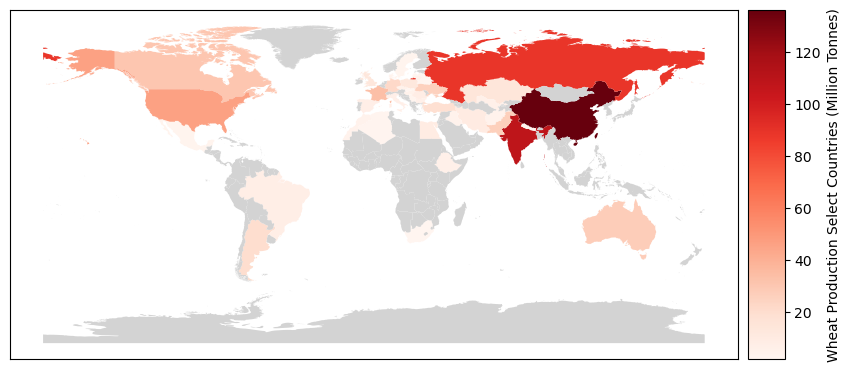

In [18]:
import mapclassify
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

                         
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_pop_wheat_geo.plot(column="Mean_wheat", cmap="Reds", figsize=(10, 10), 
                          ax=ax,legend=True, cax=cax,
                          missing_kwds={"color": "lightgrey", "label": "Missing values"},
                          legend_kwds={'label': "Wheat Production Select Countries (Million Tonnes)", 'orientation': "vertical"})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


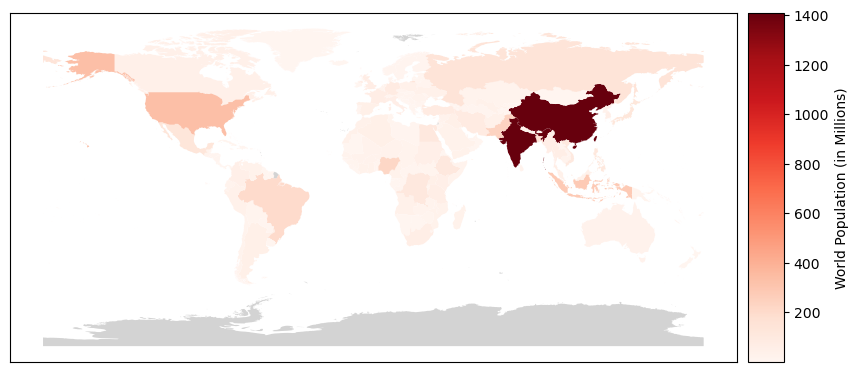

In [257]:
#Clean country names as much as possible to display map
pop_country
pop_country['Country'] = pop_country['Country'].str.replace(r'\s*\(.*\)','', regex=True)
pop_country=pop_country.replace("Ivory Coast","Côte d'Ivoire")
pop_country=pop_country.replace("Republic of the Congo","Congo")	
pop_country=pop_country.replace("Democratic Republic of the Congo","Congo DRC")	
pop_country=pop_country.replace("U.S. Virgin Islands","US Virgin Islands")	
pop_country=pop_country.replace("Saint Helena, Ascension and Tristan da Cunha","Saint Helena")
pop_country=pop_country.replace("Cape Verde","Cabo Verde")
pop_country=pop_country.replace("São Tomé and Príncipe","Sao Tome and Principe")
pop_country=pop_country.replace("Brunei","Brunei Darussalam")
pop_country=pop_country.replace("Cocos","Cocos Islands")
pop_country=pop_country.replace("Curaçao","Curacao")
pop_country=pop_country.replace("Pitcairn Islands","Pitcairn")
pop_country=pop_country.replace("Saint Barthélemy","Saint Barthelemy")
pop_country=pop_country.replace("East Timor","Timor-Leste")

merged_pop_geo= pd.merge(geopd,pop_country, on="Country", how="left")
merged_pop_geo['Population']=merged_pop_geo['Population']/1000000
#merged_pop_geo[merged_pop_geo["Population"].isna()]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

                         
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_pop_geo.plot(column="Population", cmap="Reds", figsize=(10, 10), 
                          ax=ax,legend=True, cax=cax,
                          missing_kwds={"color": "lightgrey", "label": "Missing values"},
                          legend_kwds={'label': "World Population (in Millions)", 'orientation': "vertical"})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

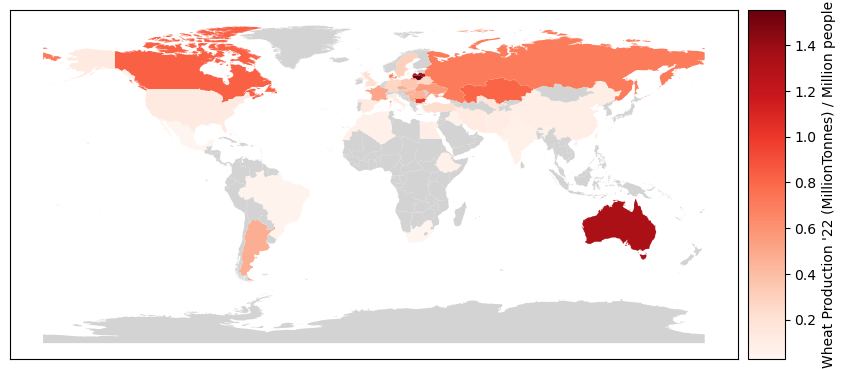

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_pop_wheat_geo.plot(column="Wheat_per_million", cmap="Reds", figsize=(10, 10), 
                          ax=ax,legend=True, cax=cax,
                          missing_kwds={"color": "lightgrey", "label": "Missing values"},
                          legend_kwds={'label': "Wheat Production '22 (MillionTonnes) / Million people", 'orientation': "vertical"})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)